In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")



Mounted at /content/gdrive


# Results 

* 66 questions in reference questions have no "?" marks

## Banglat5

```
{'numbeams5': 12,
 'greedy': 6,
 'numbeams3': 184,
 'numbeams10': 19,
 'topk50_topp095': 52,
 'topk90_topp095': 48,
 'numbeams7': 18,
 'topk10_temperature0.7': 7,
 'topp1_temperature0.95': 173}
```

 ## Mt5_small

 ```
 {'numbeams3': 184,
 'topk50_topp095': 230,
 'topk90_topp095': 201,
 'topk10_temperature0.7': 103,
 'numbeams5': 225,
 'numbeams7': 250,
 'numbeams10': 297,
 'topp1_temperature0.95': 173,
 'greedy: 154}
```

# Mt5-base

```
{'numbeams3': 188,
 'numbeams7': 258,
 'numbeams10': 275,
 'topk50_topp095': 214,
 'topk90_topp095': 130,
 'topp1_temperature0.95': 173,
 'numbeams5': 232,
 'topk10_temperature0.7': 97,
 'greedy': 115}
 ```



Data viz

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


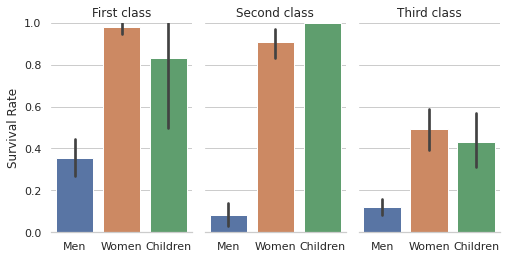

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

df = sns.load_dataset("titanic")

g = sns.catplot(
    data=df, x="who", y="survived", col="class",
    kind="bar", height=4, aspect=.6,
)
g.set_axis_labels("", "Survival Rate")
g.set_xticklabels(["Men", "Women", "Children"])
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1))
g.despine(left=True)


In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
settings = ['greedy','beam_search(3)','beam_search(5)','beam_search(7)','beam_search(10)','greedy','beam_search(3)','beam_search(5)','beam_search(7)','beam_search(10)']
model = ['banglat5','banglat5','banglat5','banglat5','banglat5','mt5_small','mt5_small','mt5_small','mt5_small','mt5_small']
values = [6,]

# Get results

In [ ]:
bt5 = {'numbeams5': 12,
 'greedy': 6,
 'numbeams3': 184,
 'numbeams10': 19,
 'topk50_topp095': 52,
 'topk90_topp095': 48,
 'numbeams7': 18,
 'topk10_temperature0.7': 7,
 'topp1_temperature0.95': 173}

In [ ]:
settings = list(bt5.keys())

In [ ]:
no_question_numbers = list(bt5.values())

In [ ]:
result_df = pd.DataFrame.from_dict({'settings':settings,'no_question_numbers':no_question_numbers})

In [ ]:
result_df['model'] = 'banglat5'

In [ ]:
mt5 = {'numbeams3': 184,
 'topk50_topp095': 230,
 'topk90_topp095': 201,
 'topk10_temperature0.7': 103,
 'numbeams5': 225,
 'numbeams7': 250,
 'numbeams10': 297,
 'topp1_temperature0.95': 173,
 'greedy': 154}

In [ ]:
settings = list(mt5.keys())

In [ ]:
no_question_numbers = list(mt5.values())

In [ ]:
result_df2 = pd.DataFrame.from_dict({'settings':settings,'no_question_numbers':no_question_numbers})

In [ ]:
result_df2['model'] = 'mt5_small'

In [ ]:
mt5_base = {'numbeams3': 188,
 'numbeams7': 258,
 'numbeams10': 275,
 'topk50_topp095': 214,
 'topk90_topp095': 130,
 'topp1_temperature0.95': 173,
 'numbeams5': 232,
 'topk10_temperature0.7': 97,
 'greedy': 115}

In [ ]:
result_df3 = pd.DataFrame.from_dict({'settings':settings,'no_question_numbers':list(mt5_base.values())})

In [ ]:
result_df3['model'] = 'mt5-base'

In [ ]:
result = pd.concat([result_df,result_df2,result_df3],axis=0)

In [ ]:
result['no_question_percentage'] = (result['no_question_numbers']/13538)*100

In [ ]:
result.to_csv("/content/gdrive/MyDrive/Related work QG/Results/errors/no_question_results2.csv",index=False)

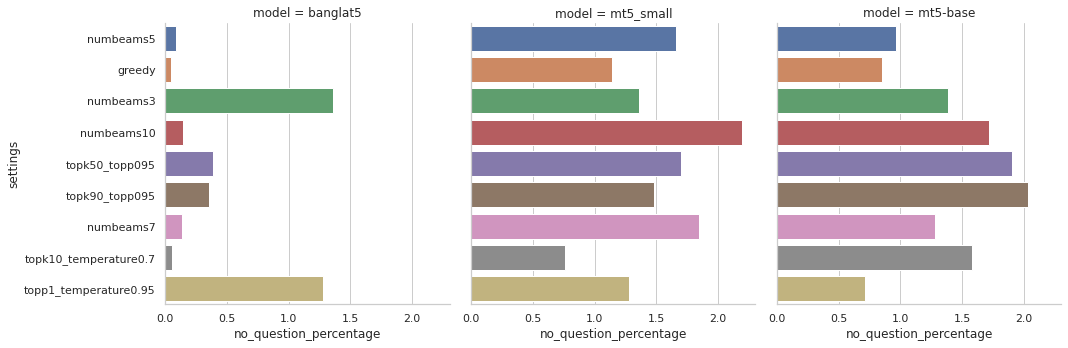

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=result, y="settings", x="no_question_percentage", col="model",
    kind="bar"
)
#g.set_axis_labels("", "Survival Rate")
#g.set_xticklabels(["Men", "Women", "Children"])
#g.set_titles("Banglat5","MT5")
#g.set(ylim=(0, 1))
#g.despine(left=True)
#g.savefig("/content/gdrive/MyDrive/Related work QG/Results/errors/no_question_results.png")
g.savefig("no_question_generation3.png")

# Results Getting

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
import pandas as pd

In [ ]:
path = "/content/gdrive/MyDrive/Related work QG/Results/banglat5-v1/greedy_banglat5(3).xlsx"

In [ ]:
df = pd.read_excel(path)

In [ ]:
check = pd.read_excel(path)

In [ ]:
check.shape

(13538, 4)

In [ ]:
df.head()

,Reference_question,Predicted_question,Answer,Context
0,কখন আইইসি রেড বুক সিডি-ডিএকে একটি আন্তর্জাতিক ...,কোন বছর রেড বুক সিডি-ডিএ স্ট্যান্ডার্ড প্রকাশি...,১৯৮৭,"ফলস্বরূপ, ১৯৭৯ সালে, সনি এবং ফিলিপস একটি নতুন ..."
1,১৯৭৯ সালের সনি এবং ফিলিপস ডিজিটাল অডিও ডিস্ক ট...,কোন ইঞ্জিনিয়াররা টাস্ক ফোর্সের নেতৃত্বে কাজ ক...,কিস শুহামার ইমমিনক এবং তোশিতাদা দোই,"ফলস্বরূপ, ১৯৭৯ সালে, সনি এবং ফিলিপস একটি নতুন ..."
2,কারা প্রথম সিডিতে দশ লক্ষ কপি বিক্রি করেছিল?,১৯৮৫ সালে সিডিতে এক মিলিয়ন কপি বিক্রি করা প্র...,ডাইর স্ট্রেইটস,১৯৮৩ সালের মার্চ মাসে ইউরোপ ও উত্তর আমেরিকায় ...
3,কোন শিল্পী তাদের সম্পূর্ণ ক্যাটালগকে সিডিতে রূ...,কোন প্রথম প্রধান শিল্পী সিডিতে তার সম্পূর্ণ ক্...,ডেভিড বোয়ি,১৯৮৩ সালের মার্চ মাসে ইউরোপ ও উত্তর আমেরিকায় ...
4,আর্মস-এ ডায়ার স্ট্রেইটস অ্যালবাম ব্রাদার্স কো...,ডাইর স্ট্রেইটস কখন ব্রাদার্স ইন আর্মস প্রকাশ ক...,১৯৮৫,১৯৮৩ সালের মার্চ মাসে ইউরোপ ও উত্তর আমেরিকায় ...


In [ ]:
no_question_reference = df['Reference_question'].str.contains('?',regex = False)

In [ ]:
df['Reference_question'].str.contains('?',regex = False).value_counts()

True     13472
False       66
Name: Reference_question, dtype: int64

In [ ]:
df[no_question_reference == False]

,Reference_question,Predicted_question,Answer,Context
102,ফিটসের দলগুলোর নাম কি,আইজিএফইটি এর দুটি পরিবারের নাম কি?,জংশন ফিট (জেএফইটি) এবং ইনসুলেটেড গেট ফিট,ফিট দুটি পরিবারে বিভক্ত: জংশন ফিট (জেএফইটি) এব...
162,আমেরিকায় প্রতিষ্ঠিত আদিবাসী আমেরিকানদের একটি ...,আমেরিকায় নেটিভ আমেরিকানরা কোন সাম্রাজ্য তৈরি ...,অ্যাজটেক সাম্রাজ্য,এশিয়াতে বিভিন্ন চীনা রাজবংশ ও জাপানি শোগুনেট ...
165,চীনে নগরায়নের অন্যতম একটি কারণ।,চীনে নগরায়ণ বৃদ্ধি করার সাথে সাথে কী ঘটেছিল?,জনসংখ্যা বৃদ্ধি,চীনে জনসংখ্যা বৃদ্ধির সাথে সাথে নগরায়ণ বৃদ্ধি...
226,"এমন এক ঘটনার নাম বলুন, যা বিপ্লবে অবদান রাখতে ...",কোন বিপ্লবের পরবর্তী ঘটনাগুলো রাজতন্ত্রের দুটি...,নেপোলিয়নের যুদ্ধ,"এই পরিবর্তনগুলোর সঙ্গে ছিল ভয়াবহ বিশৃঙ্খলা, য..."
266,নিউটনের দর্শন যখন জীবনে প্রয়োগ করা হয় তখন কি...,নিউটনের প্রাকৃতিক দর্শন জনজীবনে কী চালায়?,সামাজিক নীতি পরিবর্তনের জন্য বেশ কয়েকটি সফল প...,"আলোকায়নের ধারণা অনুসরণ করে, সংস্কারকরা শিল্প ..."
...,...,...,...,...
10420,মন্টানায় রেলপথ কতদিন ধরে গুরুত্বপূর্ণ ছিল,মন্টানায় রেলপথ কখন গুরুত্বপূর্ণ ছিল?,১৮৮০-এর দশক,১৮৮০-এর দশক থেকে রেলপথ মন্টানায় পরিবহনের একটি...
10459,কি বছরের মধ্যে আদিবাসী জনসংখ্যা ২৭.৯% বৃদ্ধি প...,মন্টানার নেটিভ আমেরিকান জনসংখ্যা কখন বৃদ্ধি পে...,১৯৮০ থেকে ১৯৯০,মার্কিন যুক্তরাষ্ট্রের অধিকাংশ রাজ্যের তুলনায়...
10498,যিনি ১৯০০-এর দশকের প্রথম দিকে মন্টানায় বসতি স...,১৯০০ সালে কে মন্টানা প্রাইরিতে বসতি স্থাপন শুর...,জেমস জে. হিল,"১৯০০ সালের প্রথম দিকে, গ্রেট নর্দানের জেমস জে...."
11179,বিপন্ন প্রজাতির কত শতাংশ হাঁস-স্ট্যাম্প ফান্ড ...,কোন শতাংশ হাঁসের স্ট্যাম্প তহবিল ব্যবহার করে স...,এক তৃতীয়াংশ,১৯৩৪ সালের ১৬ মার্চ প্রেসিডেন্ট ফ্রাঙ্কলিন ডি....


# predicted

# Banglat5

In [ ]:
import os

In [ ]:
dir_path = "/content/gdrive/MyDrive/Related work QG/Results/mt5-base"

In [ ]:
df_paths = os.listdir(dir_path)

In [ ]:
df_paths

['numbeams3_mT5base.xlsx',
 'numbeams7_mT5base.xlsx',
 'numbeams10_mT5base.xlsx',
 'top_k50_top_p_095_mt5base.xlsx',
 'top-k90_top_p095_mT5base.xlsx',
 'top_p_1_temperature_095_mT5base.xlsx',
 'numbeams5_mT5base.xlsx',
 'top_k10_temperature07_mT5base.xlsx',
 'greedy_mt5base.xlsx']

In [ ]:
dfs = []
for path in df_paths:
  dfs.append(pd.read_excel(os.path.join(dir_path,path)))

In [ ]:
error_dfs = []
no_question_stats = {}
for i in range(len(df_paths)):
  no_question_predicted = dfs[i]['Predicted_question'].str.contains('?',regex = False)
  false_counts = no_question_predicted.value_counts()[0]
  no_question_stats[df_paths[i]] = false_counts
  error_dfs.append(dfs[i][no_question_predicted==False])  

In [ ]:
no_question_stats

{'numbeams3_mT5base.xlsx': 188,
 'numbeams7_mT5base.xlsx': 258,
 'numbeams10_mT5base.xlsx': 275,
 'top_k50_top_p_095_mt5base.xlsx': 214,
 'top-k90_top_p095_mT5base.xlsx': 130,
 'top_p_1_temperature_095_mT5base.xlsx': 173,
 'numbeams5_mT5base.xlsx': 232,
 'top_k10_temperature07_mT5base.xlsx': 97,
 'greedy_mt5base.xlsx': 115}

In [ ]:
bangla_t5_errors = pd.concat(error_dfs,axis=0)

In [ ]:
bangla_t5_errors.to_csv("/content/gdrive/MyDrive/Related work QG/Results/mt5baseerrors.csv",index=False)

In [ ]:
dir_path = "/content/gdrive/MyDrive/Related work QG/Results/mt5-small-v1"

# Interrogative distribution

In [ ]:
interrogatives = ['কি','কেন','কখন','কে','কার']

In [ ]:
bt5_greedy = pd.read_excel("/content/gdrive/MyDrive/Related work QG/Results/banglat5-v1/greedy_banglat5(3).xlsx")

In [ ]:
mt5_greedy = pd.read_excel("/content/gdrive/MyDrive/Related work QG/Results/mt5-small-v1/greedy_mt5small.xlsx")

In [ ]:
mt5_base_greedy = pd.read_excel("/content/gdrive/MyDrive/Related work QG/Results/mt5-base/greedy_mt5base.xlsx")

In [ ]:
bt5_results = {'কি':0,'কেন':0,'কখন':0,'কে':0,'কার':0}
for question in bt5_greedy['Predicted_question']:
  for interrogative in interrogatives:
    if interrogative in question:
      bt5_results[interrogative]+=1



In [ ]:
bt5_results

{'কি': 1224, 'কেন': 169, 'কখন': 850, 'কে': 4210, 'কার': 1312}

In [ ]:
mt5_results = {'কি':0,'কেন':0,'কখন':0,'কে':0,'কার':0}
for question in mt5_greedy['Predicted_question']:
  for interrogative in interrogatives:
    if interrogative in question:
      mt5_results[interrogative]+=1



In [ ]:
mt5_results

{'কি': 782, 'কেন': 164, 'কখন': 582, 'কে': 3298, 'কার': 1253}

In [ ]:
mt5_results_base = {'কি':0,'কেন':0,'কখন':0,'কে':0,'কার':0}
for question in mt5_base_greedy['Predicted_question']:
  for interrogative in interrogatives:
    if interrogative in question:
      mt5_results_base[interrogative]+=1



In [ ]:
mt5_results_base

{'কি': 1091, 'কেন': 243, 'কখন': 1168, 'কে': 3847, 'কার': 1234}

In [ ]:
df_interrogative = pd.DataFrame.from_dict({"Interrogatives":interrogatives,"Number of Questions":list(bt5_results.values())})

In [ ]:
df_interrogative['model'] = 'banglat5'

In [ ]:
df_interrogative2 = pd.DataFrame.from_dict({"Interrogatives":interrogatives,"Number of Questions":list(mt5_results.values())})

In [ ]:
df_interrogative2['model'] = 'mt5_small'

In [ ]:
df_interrogative3 = pd.DataFrame.from_dict({"Interrogatives":interrogatives,"Number of Questions":list(mt5_results_base.values())})

In [ ]:
df_interrogative3['model'] = 'mt5_base'

In [ ]:
result_interrogative = pd.concat([df_interrogative,df_interrogative2,df_interrogative3],axis=0)

In [ ]:
result_interrogative

,Interrogatives,Number of Questions,model
0,কি,1224,banglat5
1,কেন,169,banglat5
2,কখন,850,banglat5
3,কে,4210,banglat5
4,কার,1312,banglat5
0,কি,782,mt5_small
1,কেন,164,mt5_small
2,কখন,582,mt5_small
3,কে,3298,mt5_small
4,কার,1253,mt5_small


In [ ]:
len(bt5_greedy)

13538

In [ ]:
import numpy as np

In [ ]:
result_interrogative['Percentage of Questions'] = np.round(result_interrogative['Number of Questions']/len(bt5_greedy)*100,2)

In [ ]:
result_interrogative.to_excel("results.xlsx")

In [ ]:
import matplotlib.font_manager as fm


In [ ]:
prop = fm.FontProperties(fname="Siyamrupali.ttf")

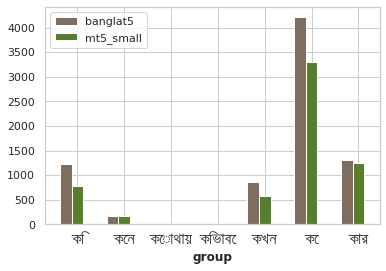

In [ ]:
 # set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = list(bt5_results.values())
bars2 = list(mt5_results.values())
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='banglat5')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='mt5_small')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], interrogatives,fontproperties=prop)
 
# Create legend & Show graphic
plt.legend()

# Context Copying

In [ ]:
!pip install pylcs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Using cached pybind11-2.10.1-py3-none-any.whl (216 kB)
  Created wheel for pylcs: filename=pylcs-0.0.7-cp38-cp38-linux_x86_64.whl size=786574 sha256=e04e4692e0fef15631c3379c53f1689f51ceedf4cb098f1737a43c63cd6524a3
  Stored in directory: /root/.cache/pip/wheels/90/ca/4a/978f36c87ffe48c7df01f7acc384fb418d2c6604a0f8e864a0
Successfully built pylcs


In [ ]:
import pylcs

In [ ]:
A = 'We are shannonai'
B = 'We like shannonai'
pylcs.lcs_sequence_length(A, B)

14

In [ ]:
mt5_base_greedy.columns

Index(['Reference_question', 'Predicted_question', 'Answer', 'Context'], dtype='object')

In [ ]:
bt5_lcs = []
for i, row in bt5_greedy.iterrows():
  bt5_lcs.append(pylcs.lcs_string_length(row['Context'],row['Predicted_question']))

In [ ]:
bt5_greedy['LCS(string)'] = bt5_lcs

In [ ]:
bt5_greedy['LCS(string)'].mean()

22.834392081548234

In [ ]:
bt5_greedy.sort_values(by='LCS(string)',ascending=False).to_csv("/content/gdrive/MyDrive/Related work QG/Results/errors/lcs_bt5.csv", index=False)

In [ ]:
mt5_lcs = []
for i, row in mt5_greedy.iterrows():
  mt5_lcs.append(pylcs.lcs_sequence_length(row['Context'],row['Predicted_question']))

In [ ]:
mt5_greedy['LCS(subsequence)'] = mt5_lcs

In [ ]:
mt5_greedy.sort_values(by='LCS(subsequence)',ascending=False).to_csv("/content/gdrive/MyDrive/Related work QG/Results/errors/lcs_mt5.csv", index=False)

In [ ]:
mt5_base_lcs = []
for i, row in mt5_base_greedy.iterrows():
  mt5_base_lcs.append(pylcs.lcs_sequence_length(row['Context'],row['Predicted_question']))

In [ ]:
mt5_base_greedy['LCS(string)'] = mt5_base_lcs

In [ ]:
mt5_base_greedy['LCS(subsequence)'] = mt5_base_lcs

In [ ]:
mt5_base_greedy.sort_values(by='LCS(subsequence)',ascending=False).to_csv("/content/gdrive/MyDrive/Related work QG/Results/errors/lcs_mt5_base.csv", index=False)

In [ ]:
mt5_base_greedy.describe()

,LCS(string),LCS(subsequence)
count,13538.000000,13538.000000
mean,49.656818,49.656818
std,19.649040,19.649040
min,6.000000,6.000000
25%,35.000000,35.000000
50%,47.000000,47.000000
75%,61.000000,61.000000
max,142.000000,142.000000


In [ ]:
bt5_greedy.describe()

,LCS(sequence),LCS(string)
count,13538.000000,13538.000000
mean,47.977545,22.834392
std,18.342991,11.934620
min,6.000000,2.000000
25%,35.000000,15.000000
50%,45.000000,20.000000
75%,58.000000,28.000000
max,211.000000,106.000000


In [ ]:
mt5_greedy.describe()

,LCS(string),LCS(sequence),LCS(subsequence)
count,13538.000000,13538.000000,13538.000000
mean,29.566406,50.002807,50.002807
std,15.369077,19.661312,19.661312
min,3.000000,7.000000,7.000000
25%,19.000000,36.000000,36.000000
50%,26.000000,47.000000,47.000000
75%,37.000000,61.000000,61.000000
max,129.000000,142.000000,142.000000


In [ ]:
mt5_base_

# Human Evaluation

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("/content/Human_Evaluation.xlsx")

In [ ]:
# df = pd.read_excel("/content/Human Evaluation BanglaT5 Results.xlsx")

In [3]:
df.head()

,Setting,Model,Reference_question,Predicted_question,Answer,Context,Answerability,Correctness,Relevance _to_context,Relevance_to_answer
0,"Topk-10,temp-0.7.",mt5_small,হিব্রু বাইবেলের মোট কতগুলি খণ্ড আছে ?,কী কাদের মধ্যে তানাখ শব্দটি ব্যবহার করে?,তিনটি,হিব্রু বাইবেল (Hebrew Bible) বলতে ইহুদি ও খ্রি...,1.0,1.0,1.0,0.0
1,"Topk-10,temp-0.7.",mt5_small,ঢাকা শহরের আয়তন কত ?,এই শহরে কত জন লোক বাস করে?,১৩৪ বর্গমাইল,ঢাকা দক্ষিণ এশিয়ার রাষ্ট্র বাংলাদেশের রাজধানী...,1.0,1.0,1.0,0.0
2,"Topk-10,temp-0.7.",mt5_small,দ্বিতীয় বিশ্বযুদ্ধের সূচনা কবে হয় ?,কোন বছর দ্বিতীয় বিশ্বযুদ্ধের সময়সীমা ধরা হয়...,১৯৩৯ সাল,"দ্বিতীয় বিশ্বযুদ্ধ (English: World WarII, Sec...",1.0,1.0,1.0,0.0
3,"Topk-10,temp-0.7.",mt5_small,পাকিস্তানি মুসলিম জাতীয়তাবাদী চৌধুরী রহমত আলি...,কোন বছর চৌধুরী রহমত আলি কখন মুসলিম জাতীয়তাবাদী?,১৬ নভেম্বর ১৮৯৫,চৌধুরী রহমত আলি (উর্দু: چودھری رحمت علی) (১৬ ন...,0.0,0.0,0.0,0.0
4,"Topk-10,temp-0.7.",mt5_small,পাল বংশের প্রথম রাজা কে ?,কোন যোদ্ধার পুত্র ছিলেন?,গোপাল,"খালিমপুর তাম্রলিপি অনুসারে, প্রথম পাল রাজা গোপ...",1.0,1.0,1.0,0.0


In [4]:
df.dtypes

Setting                   object
Model                     object
Reference_question        object
Predicted_question        object
Answer                    object
Context                   object
Answerability            float64
Correctness              float64
Relevance _to_context    float64
Relevance_to_answer      float64
dtype: object

In [5]:
df.describe()

,Answerability,Correctness,Relevance _to_context,Relevance_to_answer
count,1352.000000,1352.000000,1352.000000,1351.000000
mean,0.920858,0.932692,0.931953,0.885270
std,0.270060,0.250647,0.251920,0.427929
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,11.000000


In [6]:
df['Model'] = df['Model'].map({"banglat5model":"banglat5","mt5_small":"mt5_small","mt5-base":"mt5_base"})

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

In [7]:
results2 = df.groupby(["Model"]).mean()

In [8]:
results2

,Answerability,Correctness,Relevance _to_context,Relevance_to_answer
Model,,,,
banglat5,0.937778,0.960000,0.968889,0.928889
mt5_base,0.982301,0.982301,0.980088,0.975664
mt5_small,0.842222,0.855556,0.846667,0.750557


In [ ]:
results = df.groupby(["Model","Setting"]).mean()

In [ ]:
results*100

Answerability  Correctness  \
Model     Setting                                         
banglat5  Beam-search(5)         96.666667    98.666667   
          Greedy                 96.000000    97.333333   
          Topk-10,temp-0.7.      88.666667    92.000000   
mt5_base  Beam-search(5)         98.013245    98.013245   
          Greedy                 99.333333    99.333333   
          Topk-10,temp-0.7.      97.350993    97.350993   
mt5_small Beam-search(5)         90.666667    91.333333   
          Greedy                 87.333333    89.333333   
          Topk-10,temp-0.7.      74.666667    76.000000   

                             Relevance _to_context  Relevance_to_answer  
Model     Setting                                                        
banglat5  Beam-search(5)                 97.333333            96.000000  
          Greedy                         98.000000            96.000000  
          Topk-10,temp-0.7.              95.333333            86.666667  
mt5_base  Beam-search(5)                 97.350993            98.013245  
          Greedy                         99.333333            98.666667  
          Topk-10,temp-0.7.              97.350993            96.026490  
mt5_small Beam-search(5)                 90.000000            81.333333  
          Greedy                         89.333333            84.000000  
          Topk-10,temp-0.7.              74.666667            59.731544

In [ ]:
results.to_excel("Human_Evaluation_results_percentage.xlsx")

In [ ]:
context_good_answer_fail = df[(df['Answerability']==1) & (df['Correctness'] == 1) & (df['Relevance _to_context'] == 1) & (df['Relevance_to_answer']==0)]

In [ ]:
len(context_good_answer_fail)

70

In [ ]:
(58/1150)*100

5.043478260869565

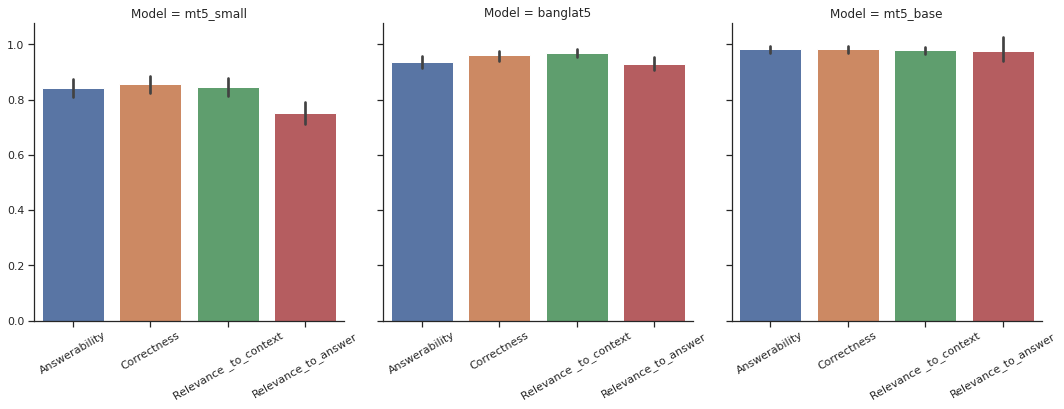

In [ ]:
sns.set_theme(style="whitegrid", palette="pastel")
sns.set(rc={'figure.figsize':(10,12)})
sns.set_style("ticks")
g = sns.catplot(
    data=df, col="Model",
    kind="bar"
)
g.set_xticklabels(
    labels=results.columns, rotation=30)
g.savefig("human_results.png");

AttributeError: ignored

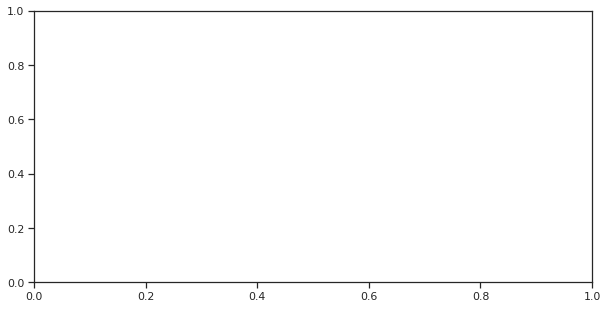

In [ ]:
sns.set_theme(style="whitegrid", palette="pastel")
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(data=df,col='Model')
ax.set(xlabel='Dimensions of Human Evaluation', ylabel='Questions',title='Results of Human Evaluation');
sns.despine(bottom = True, left = True)
plt.savefig("human_results.png")
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
